In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy import stats 
import scipy.stats as st
from scipy.stats import linregress
import pandas as pd
import numpy as np
import seaborn as sns
import os
import csv

In [2]:
owid_path = "./owid-covid-data.csv"

In [3]:
owid = pd.read_csv(owid_path, low_memory=False, encoding="utf-8")

In [4]:
owid_2 = owid[["location", "date", "total_cases", "total_deaths","population", "population_density", "median_age"]]

In [5]:
countries = ["China", "Japan", "New Zealand", "United Kingdom", "Italy", "Sweden", "United States", "Brazil"]
magic = "|".join(countries)

owid_df = owid_2[owid_2["location"].str.contains(magic,regex=True)]

In [6]:
owid_df[owid_df.location.isin(['United States', 'China', 'Italy', 'Sweeden', 'UK', 'Japan', 'New Zealand', 'Brazil'])]


,location,date,total_cases,total_deaths,population,population_density,median_age
6743,Brazil,12/31/2019,NaN,NaN,212559409.0,25.040,33.5
6744,Brazil,1/1/2020,NaN,NaN,212559409.0,25.040,33.5
6745,Brazil,1/2/2020,NaN,NaN,212559409.0,25.040,33.5
6746,Brazil,1/3/2020,NaN,NaN,212559409.0,25.040,33.5
6747,Brazil,1/4/2020,NaN,NaN,212559409.0,25.040,33.5
...,...,...,...,...,...,...,...
49277,United States,10/22/2020,8336282.0,222201.0,331002647.0,35.608,38.3
49278,United States,10/23/2020,8408340.0,223042.0,331002647.0,35.608,38.3
49279,United States,10/24/2020,8493669.0,223995.0,331002647.0,35.608,38.3
49280,United States,10/25/2020,8576725.0,224899.0,331002647.0,35.608,38.3


In [7]:
# Separate countries of interest and last row of data

In [8]:
owid_3 = owid_df.drop_duplicates(subset=['location'], keep='last').drop([50615])

In [9]:
# Rename columns

In [10]:
owid_4 = owid_3.rename(columns={"location": "Location", "date": "Date", "total_cases": "Total Cases", "total_deaths": "Total Deaths",
                             "population": "Population", "population_density":"Population Density", "median_age": "Median Age (years)"})
owid_4

,Location,Date,Total Cases,Total Deaths,Population,Population Density,Median Age (years)
7043,Brazil,10/26/2020,5394128.0,157134.0,2.125594e+08,25.040,33.5
9299,China,10/26/2020,91151.0,4739.0,1.439324e+09,147.674,38.7
17596,United Kingdom,10/26/2020,873800.0,44896.0,6.788600e+07,272.898,40.8
24568,Italy,10/26/2020,525782.0,37338.0,6.046183e+07,205.859,47.9
25552,Japan,10/26/2020,97074.0,1718.0,1.264765e+08,347.778,48.2
37096,New Zealand,10/26/2020,1584.0,25.0,4.822233e+06,18.206,37.9
44814,Sweden,10/23/2020,110594.0,5933.0,1.009927e+07,24.718,41.0
49281,United States,10/26/2020,8636165.0,225230.0,3.310026e+08,35.608,38.3


In [11]:
# Export data into a .csv

In [12]:
owid_4.to_csv("owid_data.csv", encoding="utf-8")

In [13]:
# Separating each country data

In [14]:
Brazil = owid_4.loc[owid_4["Location"]=='Brazil']
China = owid_4.loc[owid_4["Location"]=='China']
UK = owid_4.loc[owid_4["Location"]=='United Kingdom']
Italy = owid_4.loc[owid_4["Location"]=='Italy']
Japan = owid_4.loc[owid_4["Location"]=='Japan']
New_Zealand = owid_4.loc[owid_4["Location"]=='New Zealand']
Sweden = owid_4.loc[owid_4["Location"]=='Sweden']
US = owid_4.loc[owid_4["Location"]=='United States']

In [15]:
# Calculate Mortality Rate for each country

In [16]:
br_rate = Brazil['Total Deaths']*1000000/ Brazil['Population']
br_rate[7043].round(decimals=2)

739.25

In [17]:
chi_rate = China['Total Deaths']*1000000/ China['Population']
chi_rate[9299].round(decimals=2)

3.29

In [18]:
uk_rate = UK['Total Deaths']*1000000/ UK['Population']
uk_rate[17596].round(decimals=2)

661.34

In [19]:
it_rate = Italy['Total Deaths']*1000000/ Italy['Population']
it_rate[24568].round(decimals=2)

617.55

In [20]:
jp_rate = Japan['Total Deaths']*1000000/ Japan['Population']
jp_rate[25552].round(decimals=2)

13.58

In [21]:
nz_rate = New_Zealand['Total Deaths']*1000000/ New_Zealand['Population']
nz_rate[37096].round(decimals=2)

5.18

In [22]:
se_rate = Sweden['Total Deaths']*1000000/ Sweden['Population']
se_rate[44814].round(decimals=2)

587.47

In [23]:
us_rate = US['Total Deaths']*1000000/ US['Population']
us_rate[49281].round(decimals=2)

680.45

In [24]:
# Calculate number of cases per Km2 for each country

In [25]:
br_case = Brazil['Total Cases']*Brazil['Population Density']/Brazil['Population']
br_case[7043].round(decimals=2)

0.64

In [26]:
chi_case = China['Total Cases']*China['Population Density']/China['Population']
chi_case[9299].round(decimals=2)

0.01

In [27]:
uk_case = UK['Total Cases']*UK['Population Density']/UK['Population']
uk_case[17596].round(decimals=2)

3.51

In [28]:
it_case = Italy['Total Cases']*Italy['Population Density']/Italy['Population']
it_case[24568].round(decimals=2)

1.79

In [29]:
jp_case = Japan['Total Cases']*Japan['Population Density']/Japan['Population']
jp_case[25552].round(decimals=2)

0.27

In [30]:
nz_case = New_Zealand['Total Cases']*New_Zealand['Population Density']/New_Zealand['Population']
nz_case[37096].round(decimals=2)

0.01

In [31]:
se_case = Sweden['Total Cases']*Sweden['Population Density']/Sweden['Population']
se_case[44814].round(decimals=2)

0.27

In [32]:
us_case = US['Total Cases']*US['Population Density']/US['Population']
us_case[49281].round(decimals=2)

0.93

In [33]:
array = [us_rate[49281], se_rate[44814], nz_rate[37096], jp_rate[25552], it_rate[24568], 
         uk_rate[17596], chi_rate[9299], br_rate]

In [34]:
arrays = [us_case[49281], se_case[44814], nz_case[37096], jp_case[25552], it_case[24568], 
         uk_case[17596], chi_case[9299], br_case]

In [35]:
x = ['United States', 'Sweeden', 'New Zealand','Japan', 'Italy','UK', 'China', 'Brazil']

In [36]:
%matplotlib inline
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from numpy.random import randn

In [37]:
# Generate bar plots

Text(0.5, 1.0, 'COVID Deaths per million people 10/26/2020')

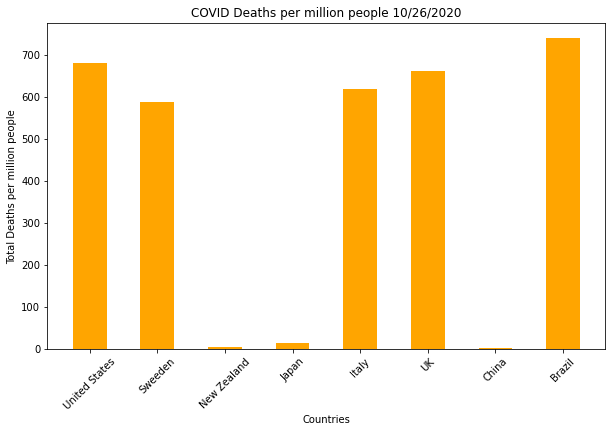

In [38]:
plt.figure(figsize=(10,6))
plt.xlabel("Countries")
plt.ylabel("Total Deaths per million people")
plt.xticks(rotation = 45)
plt.bar(x, array, color = "orange", width = .5)
plt.savefig("mortalityVspop.png")
plt.title("COVID Deaths per million people 10/26/2020")

* ‘COVID Deaths per million people’ clearly represented, showing the discrepancy between countries, probably a reflex of their policy adopted against the pandemic. Sweden shows a high concentration of deaths per million. Although it had only 5933 deaths, this country has a total population of 10,099,270.

Text(0.5, 1.0, 'COVID Total Cases per Km2 10/26/2020')

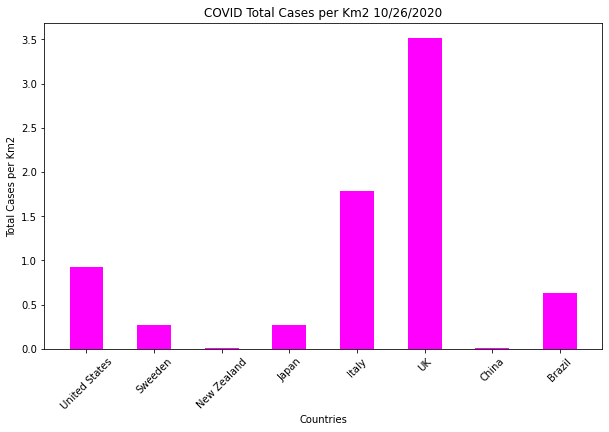

In [39]:
plt.figure(figsize=(10,6))
plt.xlabel("Countries")
plt.ylabel("Total Cases per Km2")
plt.xticks(rotation = 45)
plt.bar(x, arrays, color = "magenta", width = .5)
plt.savefig("casesPerKm.png")
plt.title("COVID Total Cases per Km2 10/26/2020")

* ‘COVID Total Cases per Km2’ shows an unexpected concentration of cases per area, once the virus is highly airborne transmissible, the population density has effect especially in UK and Italy, smaller countries compared to US and Brazil.

In [40]:
# Generate scatter plots and obtain Linear Regression

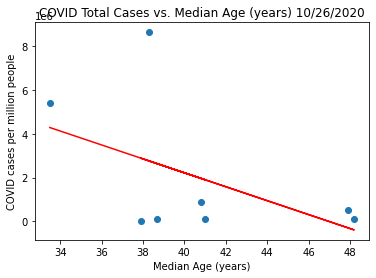

y = -318149.51 x + 14942807.83
The r-value is: -0.49343323772005127
The p-value is: 0.2140176826897873


In [41]:
x_values = owid_4.iloc[:,6]
y_values = owid_4.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Median Age (years)")
plt.ylabel('COVID cases per million people')
plt.title("COVID Total Cases vs. Median Age (years) 10/26/2020")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.savefig("2.png")
plt.show()
print(line_eq)
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

*Low negative correlation

*Insufficient evidence against Null hypothesis

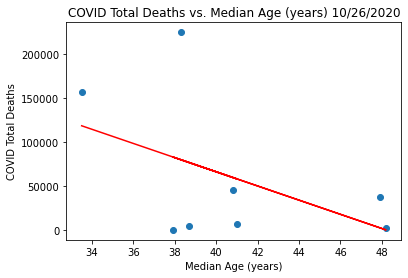

y = -8082.59 x + 389295.25
The r-value is: -0.4795286710526217
The p-value is: 0.22920858515649697


In [42]:
x_values = owid_4.iloc[:,6]
y_values = owid_4.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel("Median Age (years)")
plt.ylabel("COVID Total Deaths")
plt.title("COVID Total Deaths vs. Median Age (years) 10/26/2020")
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.savefig("3.png")
plt.show()
print(line_eq)
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

*Low negative correlation

*Insufficient evidence against Null hypothesis